In [2]:
import torch
import torch.distributions as dist

In [5]:
## Lets create a Bernorlli distribution
bernoulli = dist.Bernoulli(probs=torch.tensor([0.5]))
print(bernoulli)
## Sample from the distribution
for _ in range(10):
    print(bernoulli.sample())


Bernoulli(probs: tensor([0.5000]))
tensor([1.])
tensor([1.])
tensor([0.])
tensor([1.])
tensor([0.])
tensor([1.])
tensor([0.])
tensor([1.])
tensor([1.])
tensor([1.])


In [19]:
samples = [bernoulli.sample() for _ in range(1000)]
print(f"Mean: {torch.mean(torch.stack(samples))}")
print(f"Variance: {torch.var(torch.stack(samples))}")

Mean: 0.5
Variance: 0.2502502501010895


In [9]:
## Lets create a Normal distribution
normal = dist.Normal(loc=0, scale=1)
for _ in range(10):
    print(normal.sample())

tensor(0.2916)
tensor(-0.7772)
tensor(-0.0187)
tensor(1.8878)
tensor(-0.5216)
tensor(-0.3779)
tensor(1.7826)
tensor(-1.1875)
tensor(0.2963)
tensor(-0.0711)


In [10]:
samples = [normal.sample() for _ in range(1000)]
print(f"Mean: {torch.mean(torch.stack(samples))}")
print(f"Variance: {torch.var(torch.stack(samples))}")

Mean: -0.04347424954175949
Variance: 1.0376842021942139


# Extended

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.distributions as dist
import numpy as np

## Distribution Definitions

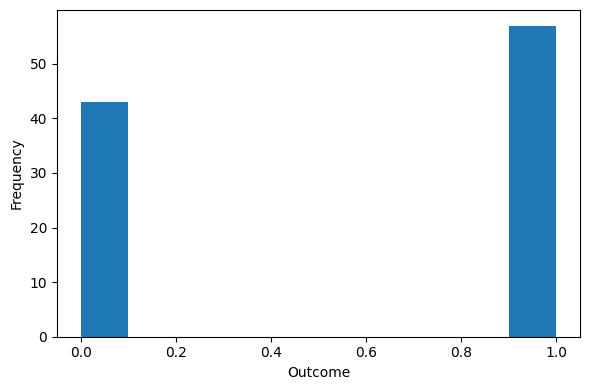

In [2]:
# Define Bernoulli dist for coin tossing
bernoulli_distribution = dist.Bernoulli(torch.tensor([0.5]))

# Plot
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# Sampling the dist
bernoulli_samples = bernoulli_distribution.sample((100,))

# Bernoulli Samples histogram
ax.hist(bernoulli_samples.numpy())
ax.set_xlabel("Outcome")
ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

## Sampling is Biased

In [7]:
# We can see that the samples are always biased.
# The more samples we take, the less visible the bias is

for n in [10, 100, 1000, 10000]:
    bernoulli_samples = bernoulli_distribution.sample((n,))
    print(f"Frequency of head in {n} samples:", torch.mean(bernoulli_samples).item())

# compute the number of heads in 1000 samples
bernoulli_samples = bernoulli_distribution.sample((1000,))

print("Number of heads:", torch.sum(bernoulli_samples).item())
print("Frequency of heads:", torch.mean(bernoulli_samples).item())

Frequency of head in 10 samples: 0.6000000238418579
Frequency of head in 100 samples: 0.44999998807907104
Frequency of head in 1000 samples: 0.4950000047683716
Frequency of head in 10000 samples: 0.4948999881744385
Number of heads: 494.0
Frequency of heads: 0.49399998784065247


## Gaussian Sampling

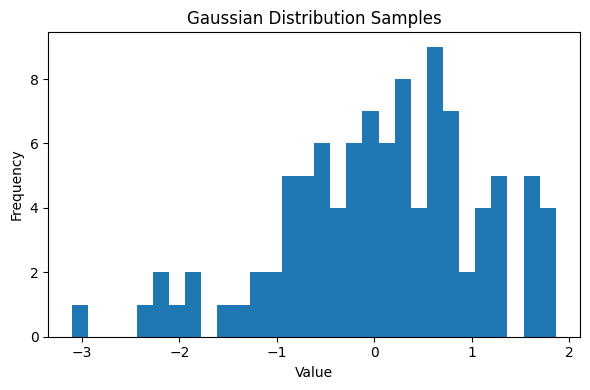

Mean of Gaussian samples: 0.07167517393827438
Mean of 10 Gaussian samples: 0.18760767579078674
Mean of 100 Gaussian samples: 0.018622592091560364
Mean of 1000 Gaussian samples: -0.04289760813117027
Mean of 100000 Gaussian samples: 0.00015813186473678797


In [8]:
# For simplicity, let's assume a standard normal dist with mean = 0 and std = 1
gaussian_distribution = dist.Normal(torch.tensor([0.0]), torch.tensor([1.0]))

# plot sample
fig, ax = plt.subplots(1, 1, figsize=(6,4))

# sampling from dist
gaussian_samples = gaussian_distribution.sample((100,))

# samples histogram
ax.hist(gaussian_samples.numpy(), bins=30)
ax.set_title("Gaussian Distribution Samples")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

print("Mean of Gaussian samples:", torch.mean(gaussian_samples).item())

for n in [10, 100, 1000, 100000]:
    gaussian_samples = gaussian_distribution.sample((n,))
    print(f"Mean of {n} Gaussian samples:", torch.mean(gaussian_samples).item())

## Probability Density Function (PDF)

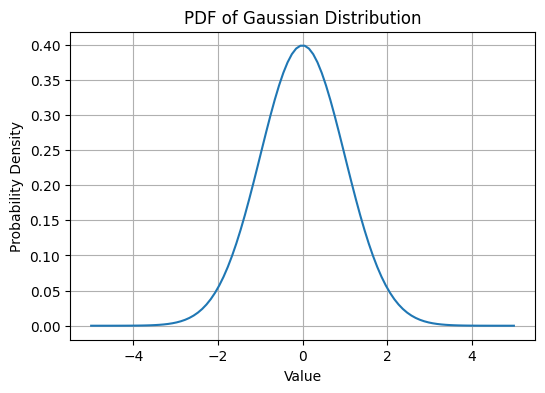

In [9]:
x_values = torch.linspace(-5, 5, 100)
pdf_values = torch.exp(gaussian_distribution.log_prob(x_values))

plt.figure(figsize=(6,4))
plt.plot(x_values.numpy(), pdf_values.numpy())
plt.title("PDF of Gaussian Distribution")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.grid(True)
plt.show()